In [1]:
import os
import zipfile

local_zip = 'C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/')
zip_ref.close()

local_zip = 'C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/')
zip_ref.close()

In [2]:
high_dir = os.path.join('C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Train/High')
medium_dir = os.path.join('C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Train/Medium')
low_dir = os.path.join('C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Train/Low')

print('total training high images:', len(os.listdir(high_dir)))
print('total training medium images:', len(os.listdir(medium_dir)))
print('total training low images:', len(os.listdir(low_dir)))

high_files = os.listdir(high_dir)
print(high_files[:10])

medium_files = os.listdir(medium_dir)
print(medium_files[:10])

low_files = os.listdir(low_dir)
print(low_files[:10])

total training high images: 149
total training medium images: 149
total training low images: 149
['Blue_high_pos0image_2023-04-26-15-05-06.png', 'Blue_high_pos0image_2023-04-26-15-05-27.png', 'Blue_high_pos0image_2023-04-26-15-06-04.png', 'Blue_high_pos0image_2023-04-26-15-06-38.png', 'Blue_high_pos0image_2023-04-26-15-07-45.png', 'Blue_high_pos0image_2023-04-26-15-08-07.png', 'Blue_high_pos0image_2023-04-26-15-08-39.png', 'Blue_high_pos0image_2023-04-26-15-09-08.png', 'Blue_high_pos0image_2023-04-26-15-10-18.png', 'Blue_high_pos0image_2023-04-26-15-10-55.png']
['Blue_med_pos0image_2023-04-26-15-15-42.png', 'Blue_med_pos0image_2023-04-26-15-16-16.png', 'Blue_med_pos0image_2023-04-26-15-16-48.png', 'Blue_med_pos0image_2023-04-26-15-17-18.png', 'Blue_med_pos0image_2023-04-26-15-18-16.png', 'Blue_med_pos0image_2023-04-26-15-18-45.png', 'Blue_med_pos0image_2023-04-26-15-19-16.png', 'Blue_med_pos0image_2023-04-26-15-19-40.png', 'Blue_med_pos0image_2023-04-26-15-20-39.png', 'Blue_med_pos0ima

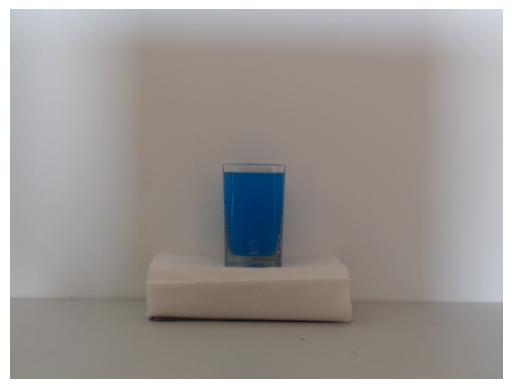

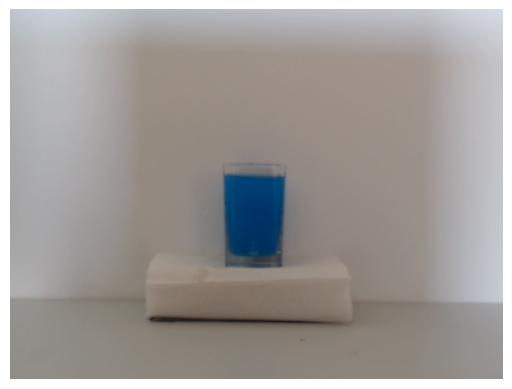

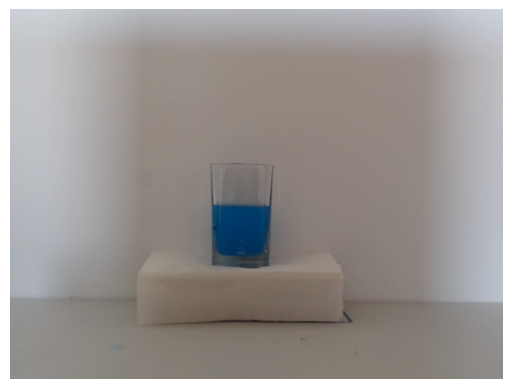

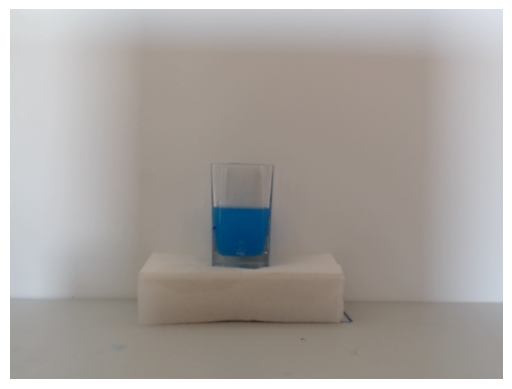

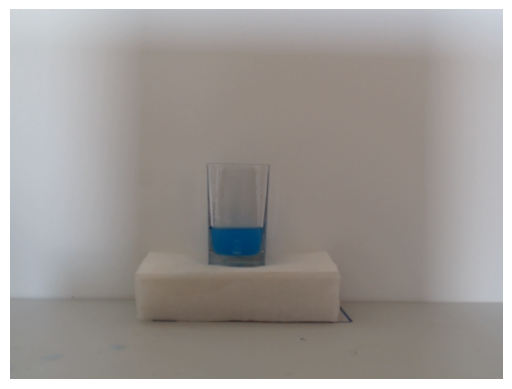

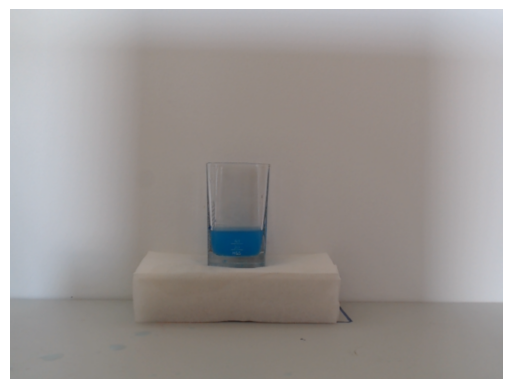

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_high = [os.path.join(high_dir, fname) 
                for fname in high_files[pic_index-2:pic_index]]
next_medium = [os.path.join(medium_dir, fname) 
                for fname in medium_files[pic_index-2:pic_index]]
next_low = [os.path.join(low_dir, fname) 
                for fname in low_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_high+next_medium+next_low):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(200,150),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(200,150),
    class_mode='categorical',
    batch_size=128
)

Found 447 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAINING_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 150),
  batch_size=32)

Found 447 files belonging to 3 classes.
Using 358 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  VALIDATION_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 150),
  batch_size=32)

Found 120 files belonging to 3 classes.
Using 24 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['High', 'Low', 'Medium']


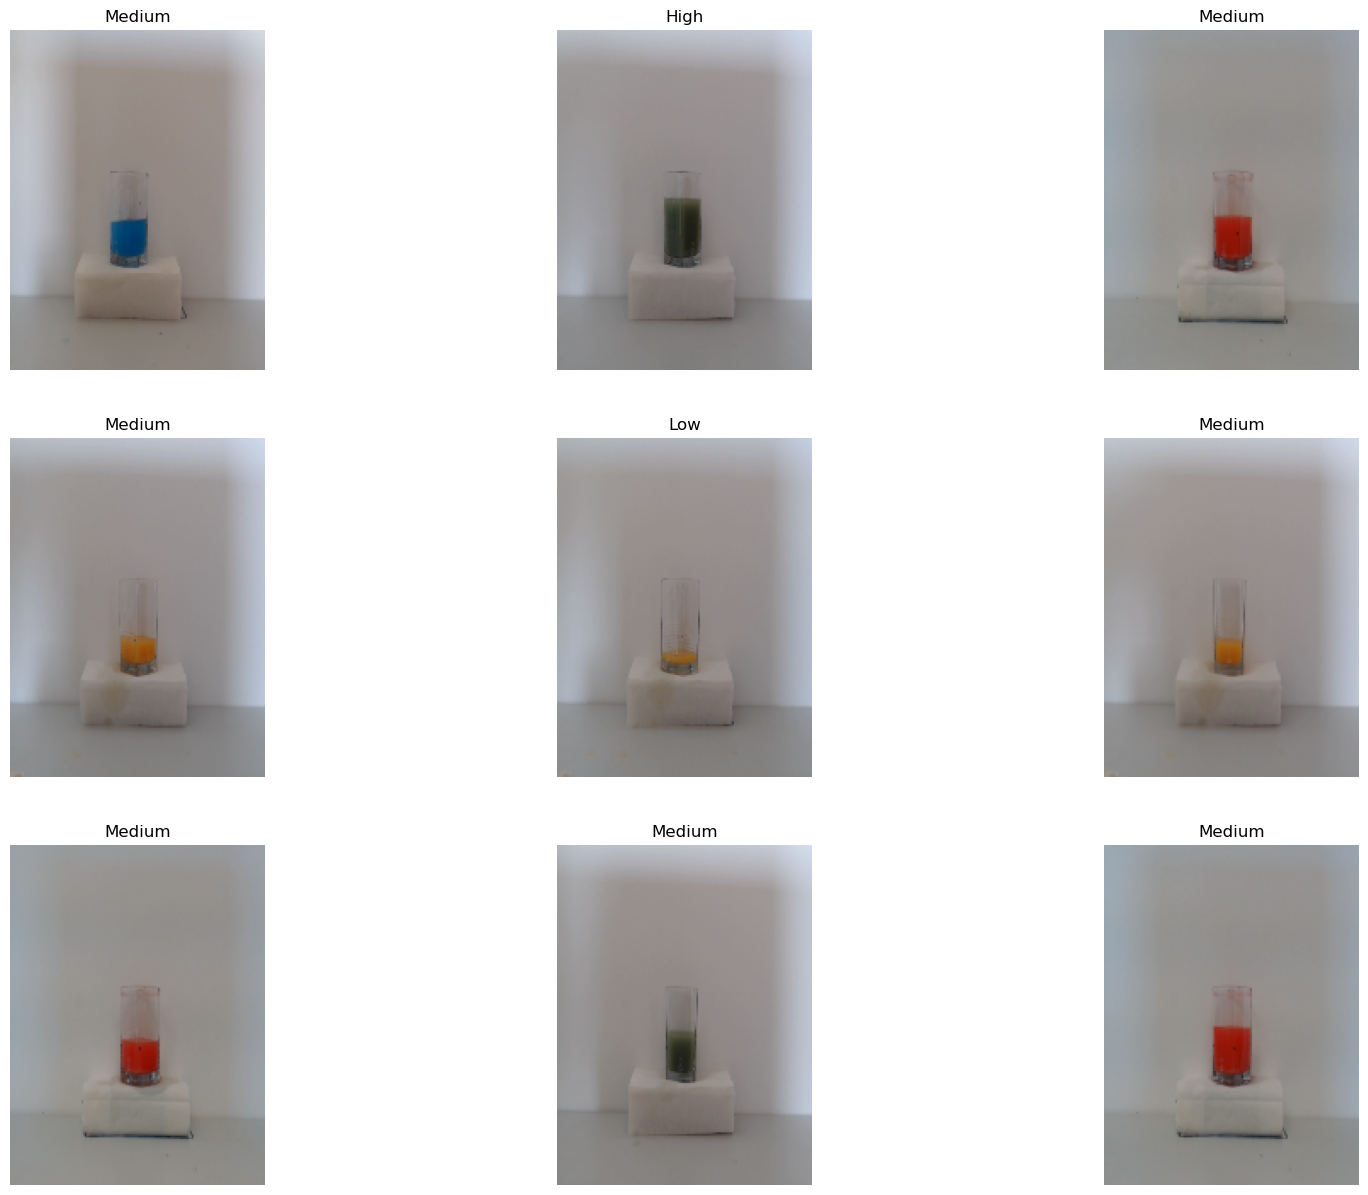

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [20]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [51]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)
model.summary()

model.save("waterlevel1.h5")


Epoch 1/10
12/12 [==============================] - 3s 181ms/step - loss: 0.0763 - accuracy: 0.9609 - val_loss: 0.6636 - val_accuracy: 0.7500
Epoch 2/10
12/12 [==============================] - 2s 166ms/step - loss: 0.0493 - accuracy: 0.9832 - val_loss: 0.1101 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 2s 175ms/step - loss: 0.0739 - accuracy: 0.9721 - val_loss: 0.3335 - val_accuracy: 0.8333
Epoch 4/10
12/12 [==============================] - 2s 166ms/step - loss: 0.0745 - accuracy: 0.9693 - val_loss: 0.3388 - val_accuracy: 0.7917
Epoch 5/10
12/12 [==============================] - 2s 165ms/step - loss: 0.0356 - accuracy: 0.9860 - val_loss: 0.2909 - val_accuracy: 0.8750
Epoch 6/10
12/12 [==============================] - 2s 154ms/step - loss: 0.0364 - accuracy: 0.9804 - val_loss: 0.1586 - val_accuracy: 0.9167
Epoch 7/10
12/12 [==============================] - 2s 154ms/step - loss: 0.0282 - accuracy: 0.9888 - val_loss: 0.3637 - val_accuracy: 0.7917
Epoch 

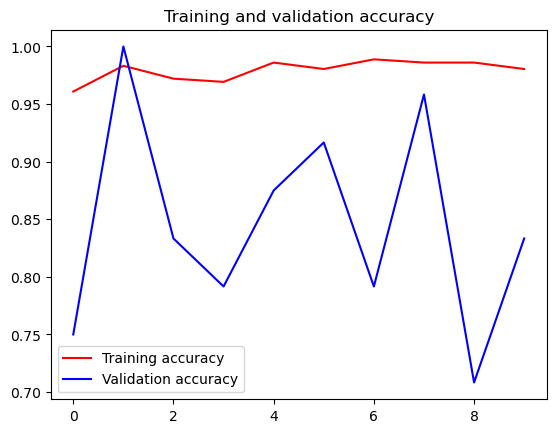

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [53]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model("C:/Users/rajas/Downloads/waterlevel1.h5")

# Load an image you want to make predictions on
#img_path = "C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Test/Low/Orange_low_pos2image_2023-04-26-16-39-32.png"
#img_path ="C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Test/High/Green_high_pos0image_2023-04-26-15-51-15.png"
#img_path ="C:/Users/rajas/OneDrive/Desktop/ScaDS/Water_level/Test/Medium/Blue_med_pos0image_2023-04-26-15-20-05.png"
img_path ="C:/Users/rajas/OneDrive/Desktop/Check.jpg"


img = image.load_img(img_path, target_size=(200, 150))  # Resizing to the model's input size
x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = tf.keras.applications.mobilenet_v2.preprocess_input(x)  # Preprocess input (based on the model you are using)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#images = np.vstack([x])
#classes = model.predict(images, batch_size=3)
#print(fn)
#print(classes)

# Make predictions
predictions = model.predict(x)

predicted_class = np.argmax(predictions, axis=1)
predicted_class_probability = predictions[0, predicted_class]
predicted_class_name = class_names[predicted_class[0]]


print("Predicted class:", predicted_class)
print("Predicted class value:", predicted_class_probability)
print("Predicted class name:", predicted_class_name)




1/1 [==============================] - 0s 92ms/step
Predicted class: [1]
Predicted class value: [8.370175]
Predicted class name: Low


In [22]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=4, steps_per_epoch=3, validation_data = validation_generator, verbose = 1, validation_steps=1)

model.save("waterlevel.h5")


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 198, 148, 64)      1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 99, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 97, 72, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 48, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 46, 34, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 23, 17, 128)    

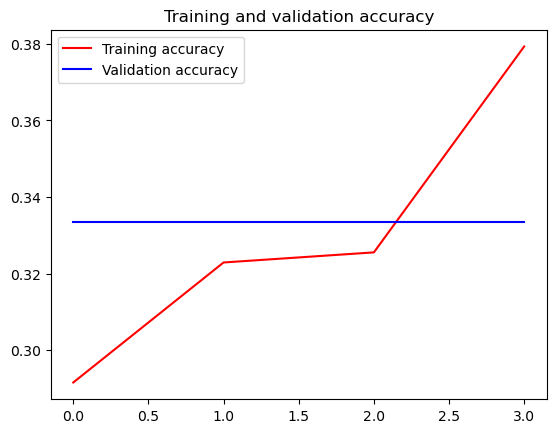

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()